# Shot Selection Anaylsis

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/full_shot_selection_data_of_playoffs_for_past_5_years.csv')
df.head()

,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_AREA,SHOT_ZONE_BASIC,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_MADE_FLAG,SEASON,WIN,BUBBLE
0,Driving Floating Jump Shot,2PT Field Goal,Center(C),Mid-Range,8-16 ft.,15,-14,157,1,2020,0,1
1,Jump Shot,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,25,-107,231,0,2020,1,1
2,Jump Shot,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,26,8,262,1,2020,0,1
3,Driving Reverse Layup Shot,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,0,3,-8,1,2020,1,1
4,Jump Shot,3PT Field Goal,Right Side Center(RC),Above the Break 3,24+ ft.,27,137,236,1,2020,0,1


### Descriptive Analysis (5 Previous Playoff Seasons)

In [3]:
# Average Shot Distance
df.groupby(['SEASON']).agg({'SHOT_DISTANCE': 'mean'})

,SHOT_DISTANCE
SEASON,
2016,12.803780
2017,13.162009
2018,13.379922
2019,13.793253
2020,14.610406


In [4]:
# Average Shot Location
df.groupby(['SEASON']).agg({'LOC_X': 'mean', 'LOC_Y': 'mean'})

,LOC_X,LOC_Y
SEASON,,
2016,-1.635912,83.877284
2017,0.570779,87.997501
2018,0.984366,95.220541
2019,0.374991,99.060453
2020,-0.711987,99.926420


In [5]:
# Most Common Shot Location
df.groupby(['SEASON'])['SHOT_ZONE_RANGE'].agg(pd.Series.mode)

SEASON
2016    Less Than 8 ft.
2017    Less Than 8 ft.
2018    Less Than 8 ft.
2019    Less Than 8 ft.
2020            24+ ft.
Name: SHOT_ZONE_RANGE, dtype: object

## Models

### KNN on Shot Made 2020 Season

KNeighborsClassifier Model 2020 Season:
               precision    recall  f1-score   support

 Missed Shot       0.60      0.60      0.60      2339
   Made Shot       0.50      0.50      0.50      1894

    accuracy                           0.56      4233
   macro avg       0.55      0.55      0.55      4233
weighted avg       0.56      0.56      0.56      4233

Confusion Matrix:
 [[1403  936]
 [ 942  952]]

Average Cross Validation Score:  0.56

Average Precision-Recall Score: 0.48


Text(0.5, 1.0, '2-class Precision-Recall Curve: AP=0.48')

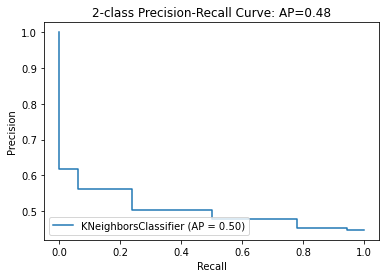

In [6]:
from sklearn.model_selection import train_test_split
df_model = df[df['SEASON'] == 2020]
X = df_model[['LOC_X', 'LOC_Y']].values
y = df_model['SHOT_MADE_FLAG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
target_names = ['Missed Shot', 'Made Shot']
print("KNeighborsClassifier Model 2020 Season:\n", classification_report(y_test, y_test_pred, target_names=target_names))

# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n",cm)

# Average Cross Validation Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(classifier, X_train, y_train, cv=10, scoring="accuracy")
print("\nAverage Cross Validation Score: ", round(np.mean(cv),2))

# Average Precision Score and Precision-Recall curve
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_test_pred)
print('\nAverage Precision-Recall Score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall Curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [7]:
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

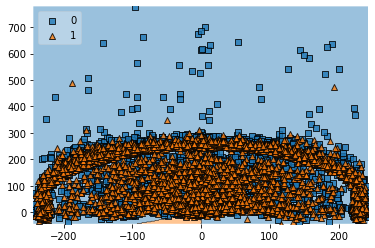

In [8]:
plot_decision_regions(X, y.to_numpy(), clf=classifier, legend=2)

### KNN on Shot Made 2019 Season

KNeighborsClassifier Model 2019 Season:
               precision    recall  f1-score   support

 Missed Shot       0.62      0.70      0.65      2407
   Made Shot       0.53      0.44      0.48      1871

    accuracy                           0.58      4278
   macro avg       0.57      0.57      0.57      4278
weighted avg       0.58      0.58      0.58      4278

Confusion Matrix:
 [[1679  728]
 [1048  823]]

Average Cross Validation Score:  0.58

Average Precision-Recall Score: 0.48


Text(0.5, 1.0, '2-class Precision-Recall Curve: AP=0.48')

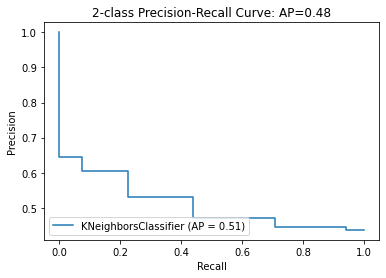

In [9]:
from sklearn.model_selection import train_test_split
df_model = df[df['SEASON'] == 2019]
X = df_model[['LOC_X', 'LOC_Y']].values
y = df_model['SHOT_MADE_FLAG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
target_names = ['Missed Shot', 'Made Shot']
print("KNeighborsClassifier Model 2019 Season:\n", classification_report(y_test, y_test_pred, target_names=target_names))

# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n",cm)

# Average Cross Validation Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(classifier, X_train, y_train, cv=10, scoring="accuracy")
print("\nAverage Cross Validation Score: ", round(np.mean(cv),2))

# Average Precision Score and Precision-Recall curve
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_test_pred)
print('\nAverage Precision-Recall Score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall Curve: '
                   'AP={0:0.2f}'.format(average_precision))

### KNN on Shot Made 2018 Season

KNeighborsClassifier Model 2018 Season:
               precision    recall  f1-score   support

 Missed Shot       0.62      0.65      0.63      2295
   Made Shot       0.54      0.50      0.52      1850

    accuracy                           0.58      4145
   macro avg       0.58      0.58      0.58      4145
weighted avg       0.58      0.58      0.58      4145

Confusion Matrix:
 [[1493  802]
 [ 920  930]]

Average Cross Validation Score:  0.58

Average Precision-Recall Score: 0.49


Text(0.5, 1.0, '2-class Precision-Recall Curve: AP=0.49')

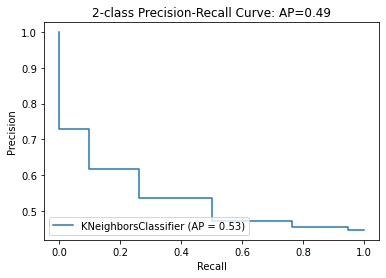

In [10]:
from sklearn.model_selection import train_test_split
df_model = df[df['SEASON'] == 2018]
X = df_model[['LOC_X', 'LOC_Y']].values
y = df_model['SHOT_MADE_FLAG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
target_names = ['Missed Shot', 'Made Shot']
print("KNeighborsClassifier Model 2018 Season:\n", classification_report(y_test, y_test_pred, target_names=target_names))

# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n",cm)

# Average Cross Validation Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(classifier, X_train, y_train, cv=10, scoring="accuracy")
print("\nAverage Cross Validation Score: ", round(np.mean(cv),2))

# Average Precision Score and Precision-Recall curve
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_test_pred)
print('\nAverage Precision-Recall Score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall Curve: '
                   'AP={0:0.2f}'.format(average_precision))

### KNN on Shot Made 2017 Season

KNeighborsClassifier Model 2017 Season:
               precision    recall  f1-score   support

 Missed Shot       0.59      0.63      0.61      2161
   Made Shot       0.52      0.48      0.50      1800

    accuracy                           0.56      3961
   macro avg       0.56      0.56      0.56      3961
weighted avg       0.56      0.56      0.56      3961

Confusion Matrix:
 [[1355  806]
 [ 930  870]]

Average Cross Validation Score:  0.58

Average Precision-Recall Score: 0.49


Text(0.5, 1.0, '2-class Precision-Recall Curve: AP=0.49')

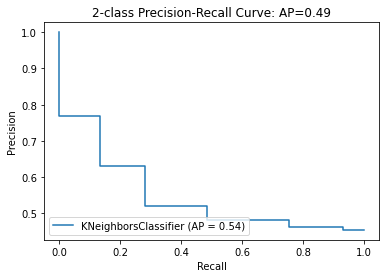

In [11]:
from sklearn.model_selection import train_test_split
df_model = df[df['SEASON'] == 2017]
X = df_model[['LOC_X', 'LOC_Y']].values
y = df_model['SHOT_MADE_FLAG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
target_names = ['Missed Shot', 'Made Shot']
print("KNeighborsClassifier Model 2017 Season:\n", classification_report(y_test, y_test_pred, target_names=target_names))

# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n",cm)

# Average Cross Validation Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(classifier, X_train, y_train, cv=10, scoring="accuracy")
print("\nAverage Cross Validation Score: ", round(np.mean(cv),2))

# Average Precision Score and Precision-Recall curve
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_test_pred)
print('\nAverage Precision-Recall Score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall Curve: '
                   'AP={0:0.2f}'.format(average_precision))

### KNN on Shot Made 2016 Season

KNeighborsClassifier Model 2016 Season:
               precision    recall  f1-score   support

 Missed Shot       0.61      0.67      0.64      2359
   Made Shot       0.54      0.48      0.51      1927

    accuracy                           0.59      4286
   macro avg       0.58      0.58      0.57      4286
weighted avg       0.58      0.59      0.58      4286

Confusion Matrix:
 [[1590  769]
 [1009  918]]

Average Cross Validation Score:  0.57

Average Precision-Recall Score: 0.49


Text(0.5, 1.0, '2-class Precision-Recall Curve: AP=0.49')

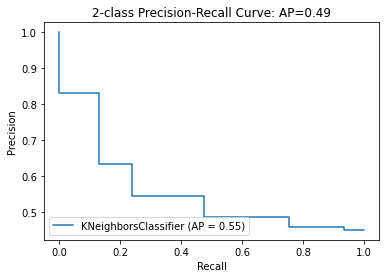

In [12]:
from sklearn.model_selection import train_test_split
df_model = df[df['SEASON'] == 2016]
X = df_model[['LOC_X', 'LOC_Y']].values
y = df_model['SHOT_MADE_FLAG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
target_names = ['Missed Shot', 'Made Shot']
print("KNeighborsClassifier Model 2016 Season:\n", classification_report(y_test, y_test_pred, target_names=target_names))

# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n",cm)

# Average Cross Validation Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(classifier, X_train, y_train, cv=10, scoring="accuracy")
print("\nAverage Cross Validation Score: ", round(np.mean(cv),2))

# Average Precision Score and Precision-Recall curve
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_test_pred)
print('\nAverage Precision-Recall Score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall Curve: '
                   'AP={0:0.2f}'.format(average_precision))